<a href="https://colab.research.google.com/github/Mateus-Maciel/projetos-1-/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=ed0a69f4f2b4c068c13efda909e508bb377af4933d457861378e50834d0518d1
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from pylab import pcolor, colorbar
from sklearn.model_selection import train_test_split

arq = files.upload()
path = list(arq.keys())[0]
df = pd.read_csv(path)
df.head()

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Shape: formato dos dados (linhas: população; colunas: info)

população,info = df.shape[0],df.shape[1]
print("População: {}; Colunas {}".format(população,info))

População: 569; Colunas 33


In [4]:
# valores vazios

emptyValues = df.isna()

#display(emptyValues)

display(emptyValues.sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Unnamed: 32 - coluna com 569 valores vazios

df = df.dropna(axis=1)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


B    357
M    212
Name: diagnosis, dtype: int64



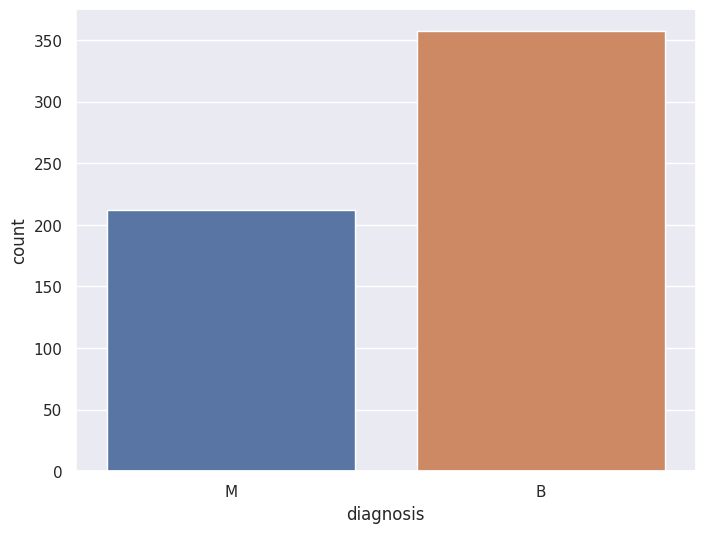

In [7]:
print("{}\n".format(df['diagnosis'].value_counts()))
# visualizando:

sns.set_theme(style="darkgrid",palette="Set1",color_codes=True)
sns.set(rc={"figure.figsize":(8,6)})
graphDiagnosis = sns.countplot(x=df["diagnosis"])

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
# trocando M e B por 1 a 0, para melhor criação e analise de dados

df.iloc [:,1] = LabelEncoder().fit_transform(df.iloc[:,1].values)
print(LabelEncoder().fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

<ipython-input-9-4a324e04a3b4>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc [:,1] = LabelEncoder().fit_transform(df.iloc[:,1].values)


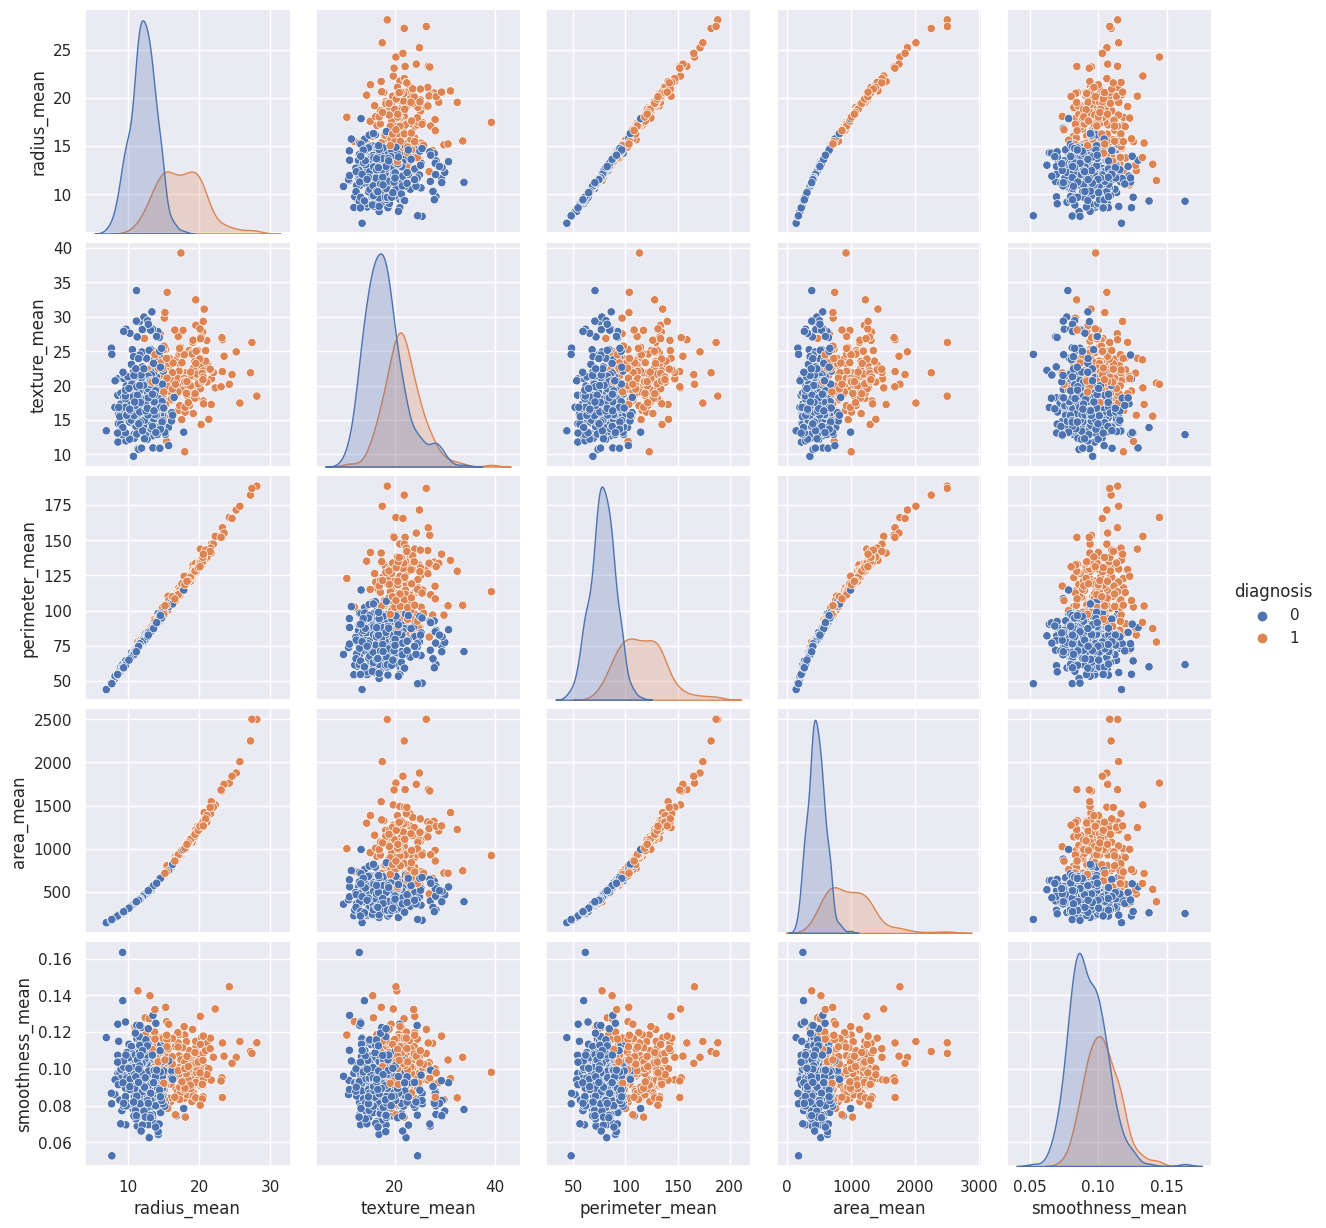

In [10]:
sns.pairplot(df.iloc[:,1:7],hue="diagnosis")

#azul: benigno
#laranja: maligno

In [11]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [12]:
# correlação entre colunas

df.iloc [:,1:12].corr() #ignorando id

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<Axes: >

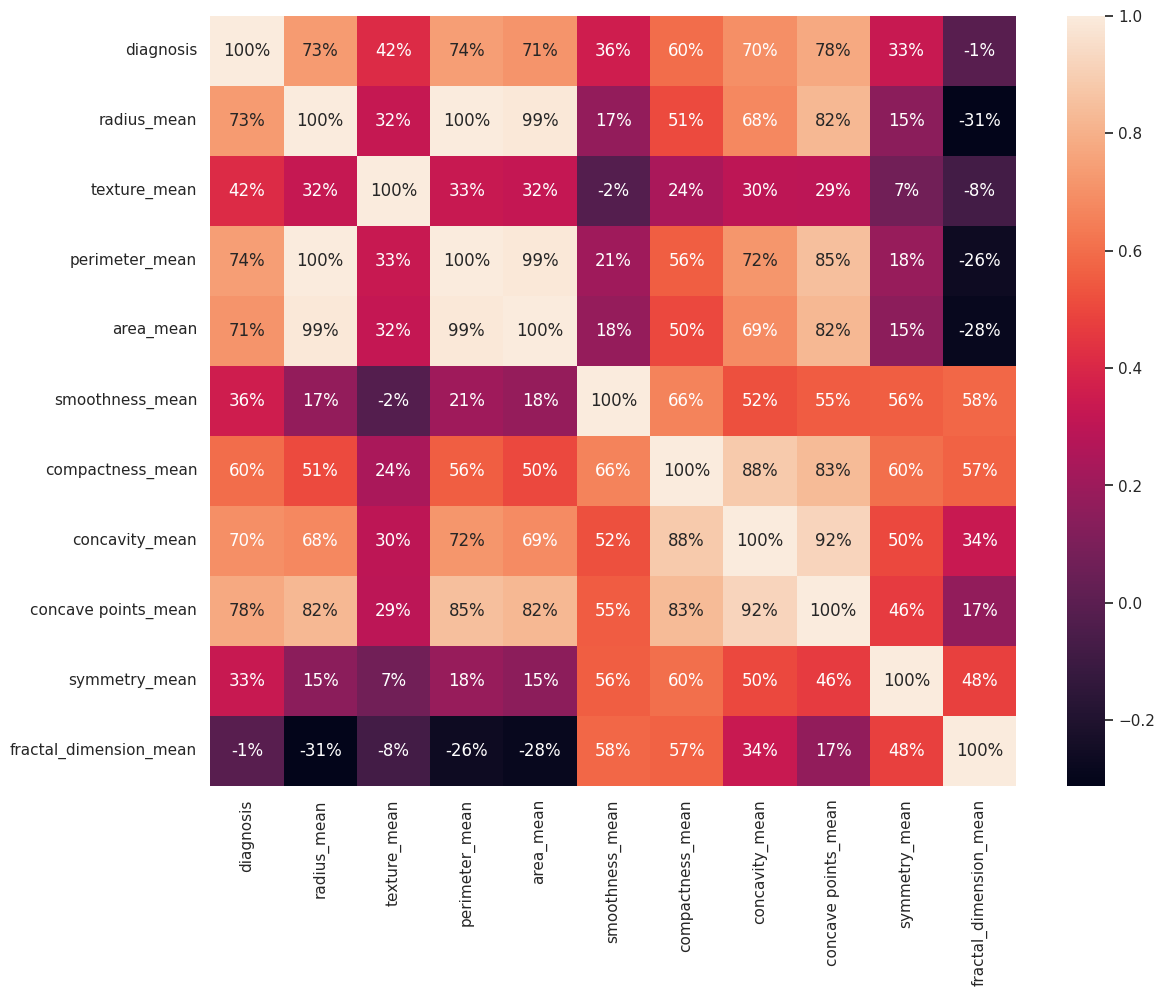

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt=".0%") #Mapa de calor

In [14]:
# Criando dados independentes e dependentes

X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

X

array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [15]:
# Mapas auto organizaveis

normalizador = MinMaxScaler(feature_range = (0,1))
Xn = normalizador.fit_transform(X)

Xn

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.56861022, 0.91202749,
        0.59846245],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.19297125, 0.63917526,
        0.23358959],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.35974441, 0.83505155,
        0.40370589],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.27180511, 0.48728522,
        0.12872068],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.74976038, 0.91065292,
        0.49714173],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.        ,
        0.25744136]])

In [16]:
som = MiniSom(x=11, y=11, input_len = 29, learning_rate = 0.5, random_seed = 2)

In [17]:
som.random_weights_init(Xn)
som.train_random(data = Xn, num_iteration = 100 )

In [18]:
# som._weights
# som.activation_map

q = som.activation_response(Xn)

q

array([[ 8.,  6.,  6.,  1.,  4., 10.,  3.,  5.,  5.,  7.,  7.],
       [ 4.,  6.,  6.,  0.,  1.,  7.,  9.,  6., 19.,  8.,  4.],
       [ 6.,  3.,  1.,  7.,  4.,  2.,  5.,  3., 24.,  4.,  6.],
       [ 3.,  7.,  0.,  2.,  1.,  2.,  1.,  9.,  5.,  2.,  0.],
       [ 1.,  2.,  1.,  7.,  1.,  2., 10.,  2.,  0.,  2.,  4.],
       [ 7.,  5.,  1.,  8., 11.,  3.,  3.,  6.,  3.,  2.,  0.],
       [ 4.,  9.,  1.,  8., 15.,  3.,  8.,  3.,  3.,  3.,  7.],
       [ 7.,  1.,  6.,  9.,  3., 12.,  4.,  2.,  3.,  1.,  3.],
       [11.,  5.,  8., 11.,  4.,  4.,  2.,  8.,  3.,  0.,  6.],
       [ 4.,  6.,  4.,  5.,  3.,  5.,  2.,  2.,  0.,  6.,  2.],
       [ 3.,  3.,  2.,  3.,  2.,  5.,  3.,  4.,  4., 10.,  4.]])

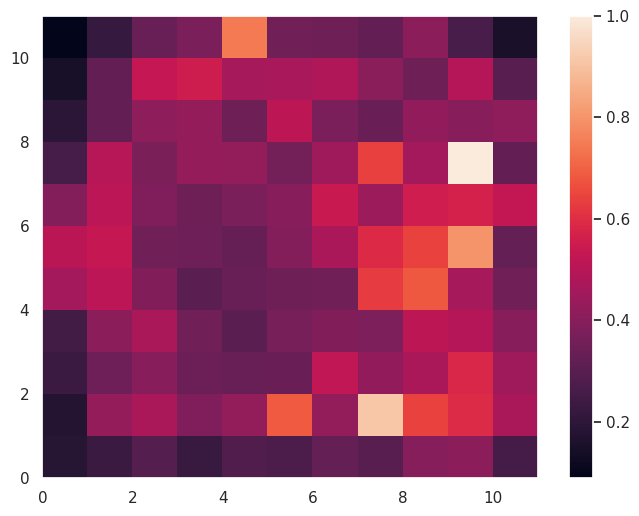

In [19]:
pcolor(som.distance_map().T)
colorbar()

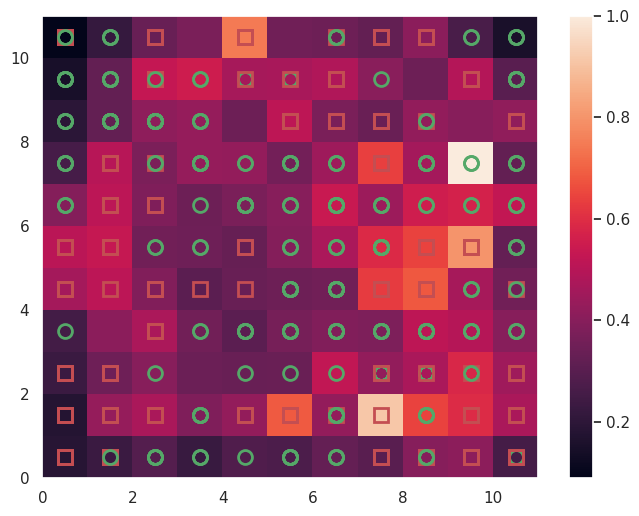

In [21]:
pcolor(som.distance_map().T)
colorbar()
w = som.winner(Xn[0]) # Vencedor de cada registro (similiaridade)
                      # winner / best matching unit

markers = ["o","s"]
color = ["g","r"]

for i, x in enumerate(Xn):
  #print(i)
  #print(x)
  w = som.winner(x)
  #print(w)
  plt.plot(w[0] + 0.5, w[1] + 0.5, markers[Y[i]],
           markerfacecolor="None",markersize = 10,
           markeredgecolor = color[Y[i]],markeredgewidth = 2)

In [22]:
# treinamento e teste

# 75% e 25%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [24]:
# feature scaling / normalizar o intervalo de variáveis independentes

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
# função para os modelos

def algdeclass(x,y):
  #regressão logistica
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression(random_state=0)
  lr.fit(x,y)

  #K-nearest neighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #arvore de decisao
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = "entropy", random_state=0)
  tree.fit(x,y)

  #floresta aleatoria
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
  forest.fit(x,y)

  return lr,knn,tree,forest

modelos = ["Regressão Logistica","KNN","Árvore de decisão","Floresta Aleatória"]

In [38]:
algdeclass = algdeclass(X_train,Y_train)

In [39]:
# matriz de confusão: testando acurácia do modelo nos dados de teste

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,algdeclass[0].predict(X_test))

In [40]:
positivo = cm[0][0]
negativo = cm[1][1]
falsoNegativo = cm[1][0]
falsoPositivo = cm[0][1]

print("Matriz de confusão:")
print(cm)
# positivos , falso positivo
# falsonegativo, negativo

print("\nAcúracia do teste:\n", (positivo + negativo)/(positivo + negativo + falsoNegativo + falsoPositivo))

Matriz de confusão:
[[86  4]
 [ 3 50]]

Acúracia do teste:
 0.951048951048951


In [41]:
for i in range(len(algdeclass)):
  print("modelo", i)
  print(modelos[i])
  print("")
  cm = confusion_matrix(Y_test,algdeclass[i].predict(X_test))
  positivo = cm[0][0]
  negativo = cm[1][1]
  falsoNegativo = cm[1][0]
  falsoPositivo = cm[0][1]
  print(cm)

  print("Acurácia do teste:", (positivo + negativo)/(positivo + negativo + falsoNegativo + falsoPositivo))

  print("")

modelo 0
Regressão Logistica

[[86  4]
 [ 3 50]]
Acurácia do teste: 0.951048951048951

modelo 1
KNN

[[89  1]
 [ 6 47]]
Acurácia do teste: 0.951048951048951

modelo 2
Árvore de decisão

[[83  7]
 [ 2 51]]
Acurácia do teste: 0.9370629370629371

modelo 3
Floresta Aleatória

[[87  3]
 [ 2 51]]
Acurácia do teste: 0.965034965034965



In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(algdeclass)):
  print("modelo: ",modelos[i])
  print("Classification_report:\n ", classification_report(Y_test, algdeclass[i].predict(X_test)))
  print("")


modelo:  Regressão Logistica
Classification_report:
                precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143


modelo:  KNN
Classification_report:
                precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143


modelo:  Árvore de decisão
Classification_report:
                precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                        

In [43]:
predtrain = algdeclass[3].predict(X_train)
print(predtrain)
print("")
print(Y_train)

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 

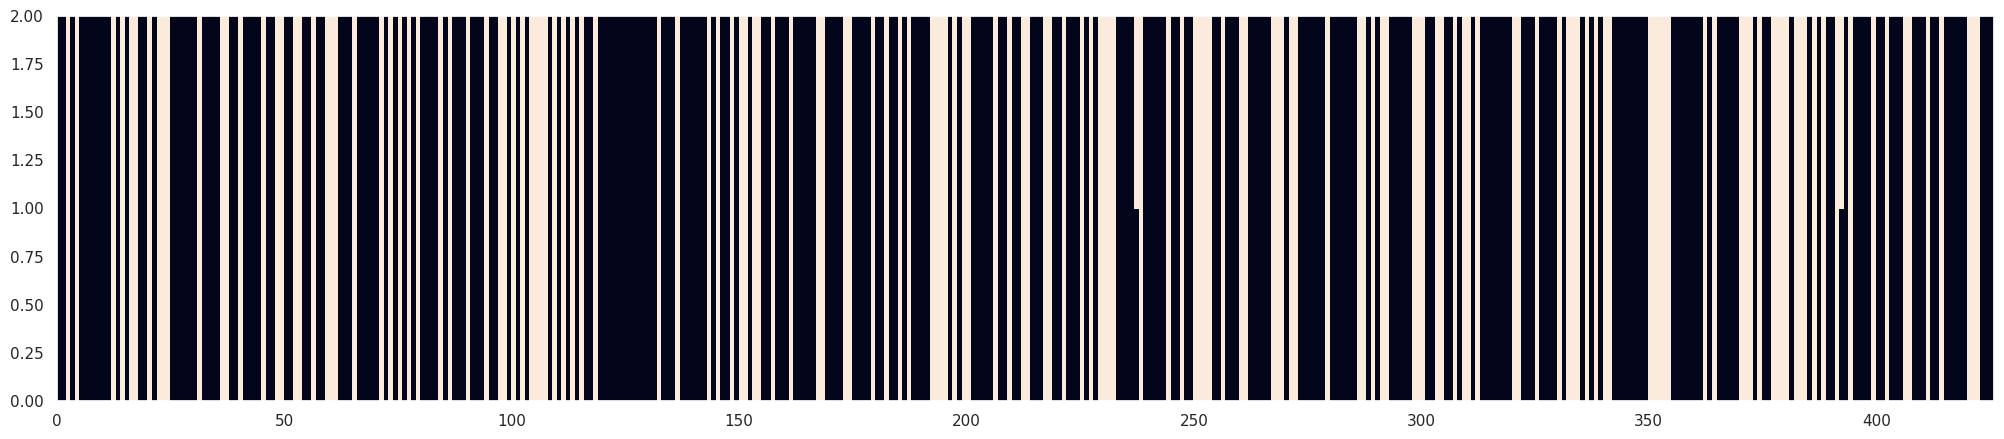

In [44]:
plt.figure(figsize=(25,5))
pcolor([predtrain, Y_train])

In [48]:
predtest = algdeclass[3].predict(X_test)
print(predtest)
print("")
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


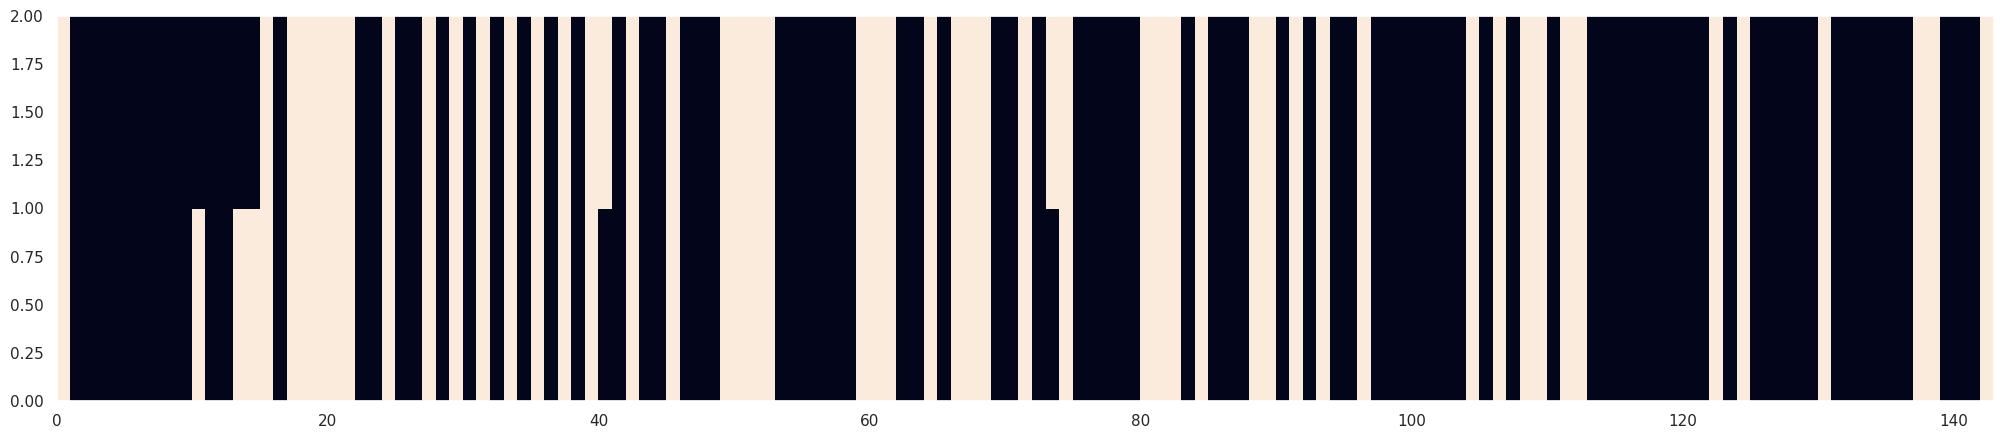

In [49]:
plt.figure(figsize=(25,5))
pcolor([predtest, Y_test])

In [50]:
predtest2 = algdeclass[2].predict(X_test)
print(predtest2)
print("")
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


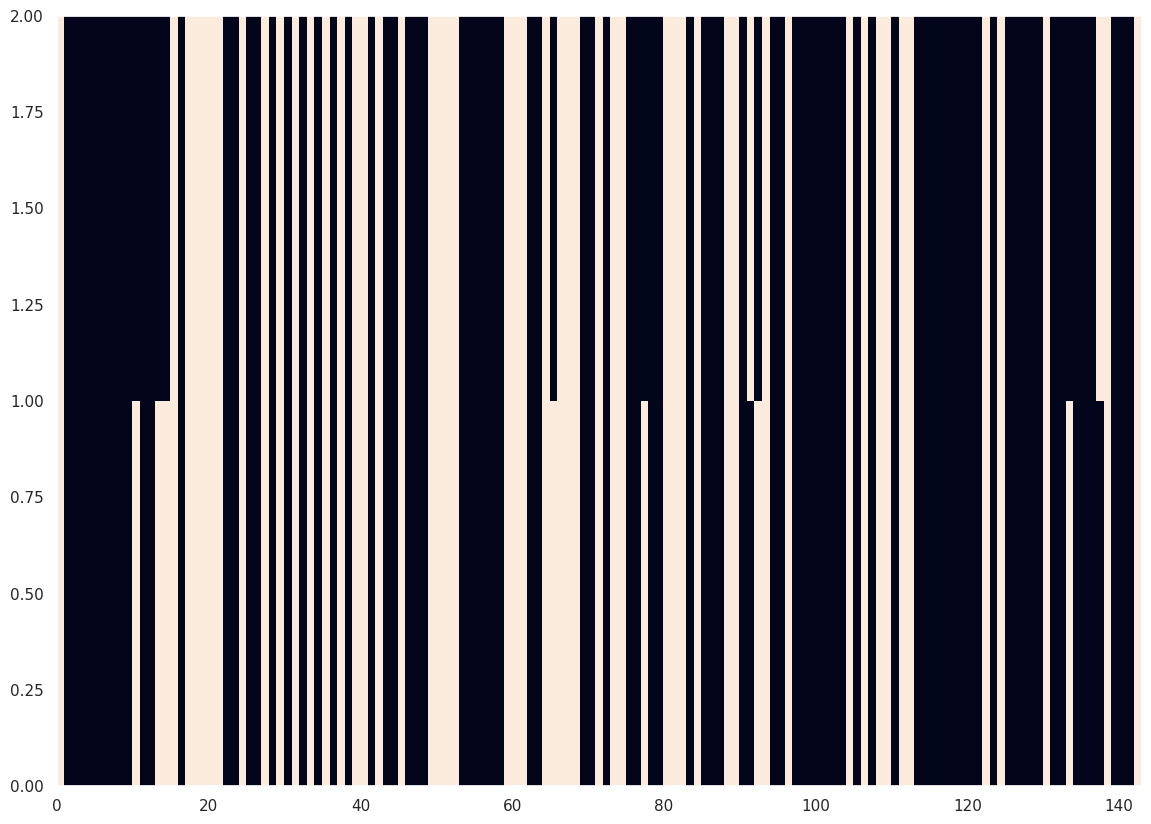

In [51]:
plt.figure(figsize=(14,10))
pcolor([predtest2,Y_test])